# Autor: Landeros Espinoza Jesus Enrique

# Task Two

# Prediction using Unsupervised ML

## Import the Libraries

In [308]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

## Read the Data

In [309]:
# Load the iris dataset
df = pd.read_csv('Iris.csv')
df 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [311]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [312]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [313]:
# detect columns with missing values in the test data
# isnull().sum() will sum the number of missing values by columns
count_of_missval_by_col = (df.isnull().sum())
count_of_missval_by_col

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [314]:
# below code will display only the columns with missing values (in absolute number of rows)
count_of_missval_by_col[count_of_missval_by_col > 0]

Series([], dtype: int64)

In [315]:
# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(count_of_missval_by_col[count_of_missval_by_col > 0]/df.shape[0])*100

Series([], dtype: float64)

In [316]:
# transform Species into categorical variable
df['Species'] = df['Species'].astype(str)

In [317]:
# value_counts() reveals the unique number of values in a column along with the frequency - let us look at string columns

df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [318]:
# value_counts(normalize = True) will express the frequency proportional to the total number of rows (in percentage)
df['Species'].value_counts(normalize=True)*100

Iris-virginica     33.333333
Iris-setosa        33.333333
Iris-versicolor    33.333333
Name: Species, dtype: float64

## Outliers Treatment

/home/ubuntu/pythonfiles/pruebaVirtual/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


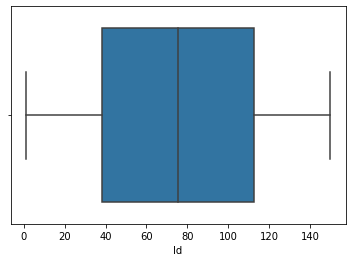

/home/ubuntu/pythonfiles/pruebaVirtual/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


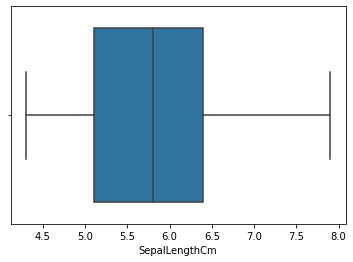

/home/ubuntu/pythonfiles/pruebaVirtual/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


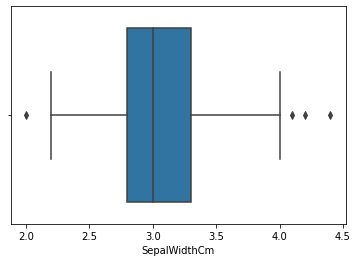

/home/ubuntu/pythonfiles/pruebaVirtual/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


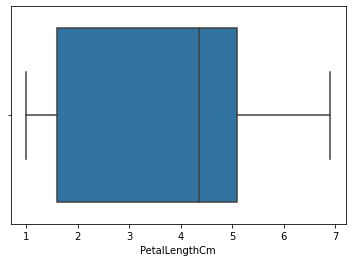

/home/ubuntu/pythonfiles/pruebaVirtual/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


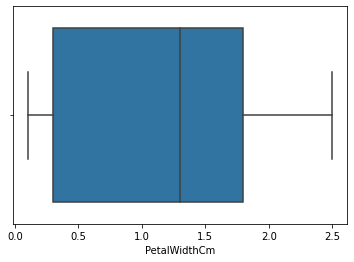

In [319]:
# To find outliers
cols = df.columns.drop('Species')
for i in cols:
    x=df[i]
    sns.boxplot(x)
    plt.show()

In [320]:
# Determine outlier using the Standard deviation method for SepalWidthCm column

# calcuate the mean of fare
SepalWidthCm_mean = df['SepalWidthCm'].mean()
# calculate the standard deviation
SepalWidthCm_std = df['SepalWidthCm'].std()
# Lower limit threshold is Mean - 3* SD
ll = SepalWidthCm_mean - (3 * SepalWidthCm_std)
# Higher limit threshold is Mean + 3* SD
hh = SepalWidthCm_mean + (3 * SepalWidthCm_std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
filt_outliers = df[(df['SepalWidthCm'] < ll) | (df['SepalWidthCm'] > hh)]
filt_outliers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa


In [321]:
# IQR method for outlier SepalWidthCm
# Calculate Q1, Q2 and IQR
q1 = df['SepalWidthCm'].quantile(0.25)                 
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = df[(df['SepalWidthCm'] < q1 - whisker_width*iqr) | (df['SepalWidthCm'] > q3 + whisker_width*iqr)]
outlier

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


<AxesSubplot:ylabel='SepalWidthCm'>

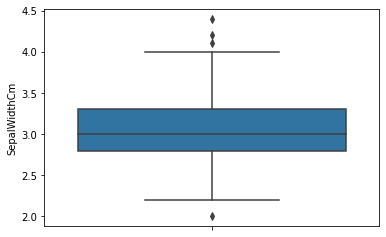

In [322]:
# boxplot with 1.5 whiskers
sns.boxplot(y='SepalWidthCm', data = df, whis=1.5)

In [323]:
# Apply filter with respect to IQR
df = df[(df['SepalWidthCm'] >= q1-whisker_width*iqr) & (df['SepalWidthCm'] <= q3+whisker_width*iqr)]
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


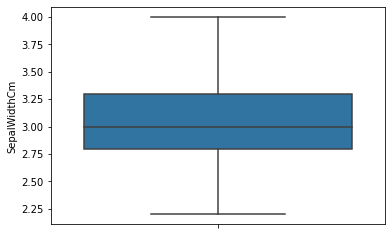

In [324]:
# Blocplot for sepal width (cm) after outlier treatment
sns.boxplot(y=df['SepalWidthCm'])
plt.show()


## Assigning Variables

In [325]:
X=df.drop('Species', axis=1)
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [326]:
X.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [327]:
# Set ID column as Index of the Dataframe
X.set_index(keys='Id', inplace=True) 

In [328]:
# Choose the columns and convert to numpy array
X=X.iloc[:, [0, 1, 2, 3]].values

In [329]:
y=df['Species']

## Create the Clusters

### Finding the optimum number of clusters for k-means classification

In [330]:
from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_errors = [] 

for i in cluster_range:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    cluster_errors.append(kmeans.inertia_)

In [331]:
#Create a Dataframe with clusters errors that we have

clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df

,num_cluster,cluster_errors
0,1,655.032534
1,2,143.860075
2,3,73.516565
3,4,53.304878
4,5,42.649083
5,6,36.508188
6,7,31.740383
7,8,28.183637
8,9,26.446921
9,10,24.667139


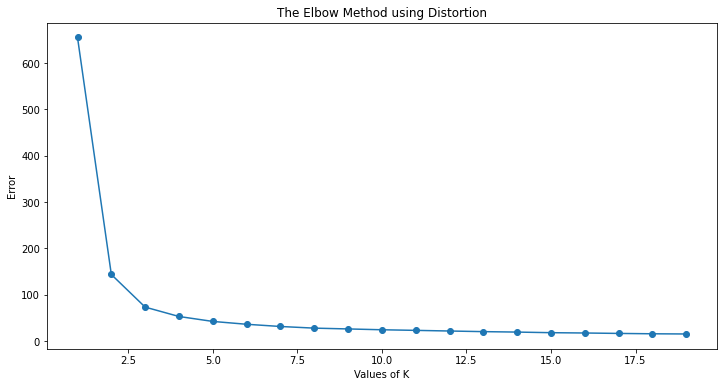

In [332]:
#Ploting elbow curve or sree to find the no. of cluster
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 


### Fit the model

In [333]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [334]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

## Visualize the Clusters

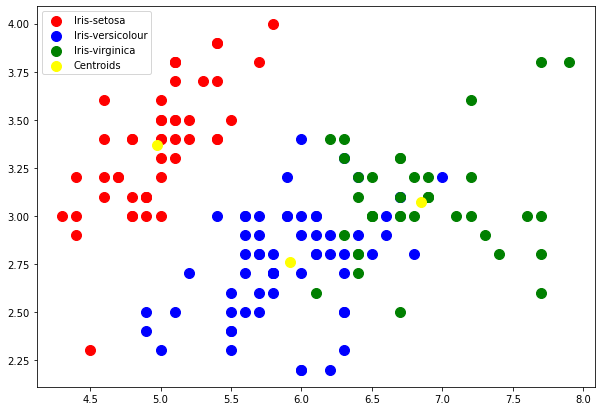

In [335]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Compare the Clusters with the Original Data

In [336]:
### Create a new Dataframe with the caracteristics of the Iris

In [337]:
comparation = pd.DataFrame(X, columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [338]:
comparation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
141,6.7,3.0,5.2,2.3
142,6.3,2.5,5.0,1.9
143,6.5,3.0,5.2,2.0
144,6.2,3.4,5.4,2.3


### Add to the Dataframe, the kmeans series

In [339]:
test_kmeans=pd.Series(y_kmeans)

In [340]:
comparation['test_kmeans']=test_kmeans

In [341]:
comparation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,test_kmeans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,2
142,6.3,2.5,5.0,1.9,1
143,6.5,3.0,5.2,2.0,2
144,6.2,3.4,5.4,2.3,2


## Add the column Species

In [342]:
comparation['Species']=y

In [343]:
comparation.dropna(inplace=True)

In [344]:
comparation.head(60)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,test_kmeans,Species
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
5,5.4,3.9,1.7,0.4,0,Iris-setosa
6,4.6,3.4,1.4,0.3,0,Iris-setosa
7,5.0,3.4,1.5,0.2,0,Iris-setosa
8,4.4,2.9,1.4,0.2,0,Iris-setosa
9,4.9,3.1,1.5,0.1,0,Iris-setosa
